# ** Busqueda Heurística** - Modelo Partida de Ajedrez

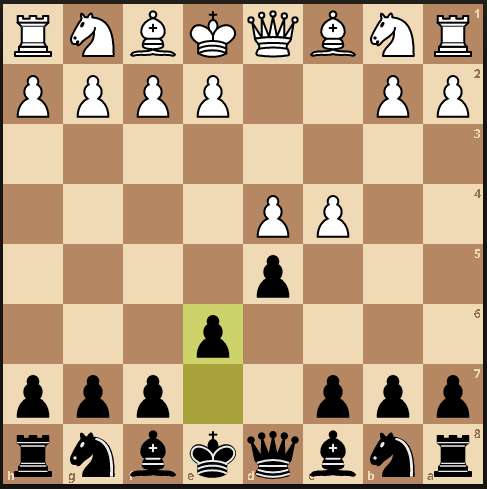

## Estructura de datos 

In [27]:

#Estructura de datos

class Grafo(object):
    def __init__(self):
        self.relaciones = {}
    def __str__(self):
        return str(self.relaciones)
class Arista(object):
    def __init__(self, elemento, peso):
        self.elemento = elemento
        self.peso = peso      
    def __str__(self):
        return str(self.elemento) + str(self.peso)
 
def agregar(grafo, elemento):
    grafo.relaciones.update({elemento:[]})
def relacionar(grafo, elemento1, elemento2, peso = 1):
    relacionarUnilateral(grafo, elemento1, elemento2, peso)
    
   
def relacionarUnilateral(grafo, origen, destino, peso):
    grafo.relaciones[origen].append(Arista(destino, peso))






# Tree Structure
#           9
#           e6
#     9  / 8 |  \8.5
#       /    |    \
#      cxd  Cc3     Cf3   
# 10  /     /\       | \
#    /   7 /  \ 8 10 |  \ 9
#   exd   Cf6  dxc dxc  Cc6
    

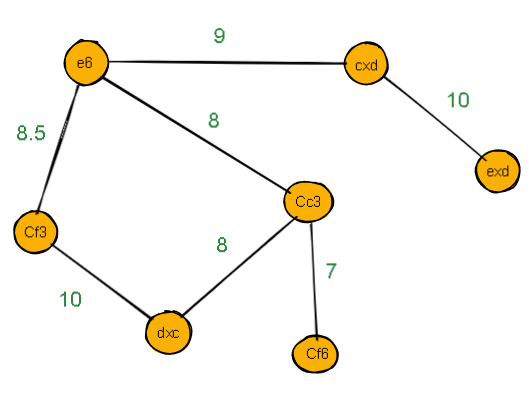

In [29]:
# En los niveles pares se va a maximizar
# En los niveles de profundidad impares de va a minimizar


def maximizar(grafo, nodo):  
  max_peso = 0
  node_name = ''
  for arista in grafo.relaciones[nodo] :
    if(arista.peso > max_peso and (not(arista.elemento in visitados ) ) ):
      max_peso = arista.peso
      node_name = arista.elemento

  
  return [node_name, max_peso,  grafo.relaciones[nodo]]



def minimizar(grafo, nodo):
  min_peso = 10
  node_name = ''
  for arista in grafo.relaciones[nodo]:
    if(arista.peso <= min_peso and (not(arista.elemento in visitados ) ) ):
      min_peso = arista.peso
      node_name = arista.elemento

  return [node_name , min_peso,  grafo.relaciones[nodo]]





In [31]:
#---Main-----#
##############
####    ######

e6 = "e6"
Cf3 = "Cf3"
Cc3 = "Cc3"
cxd = "cxd"
dxc = "dxc"
Cf6 = "Cf6"
exd = "exd"

grafo = Grafo()
agregar(grafo, e6)
agregar(grafo, Cf3)
agregar(grafo, Cc3)
agregar(grafo, cxd)
agregar(grafo, dxc)
agregar(grafo, Cf6)
agregar(grafo, exd)

relacionar(grafo, e6, Cf3, 8.5)
relacionar(grafo, e6, Cc3, 8)
relacionar(grafo, e6, cxd, 9)
relacionar(grafo, Cf3, dxc, 10)
relacionar(grafo, Cc3, dxc, 8)
relacionar(grafo, Cc3, Cf6, 7)
relacionar(grafo, cxd, exd, 10)



#mejor camino
path = []  
weight = []
visitados = []
level = 0

def encontrar_camino(grafo, node):
  global level, path, weight, visitados

  if (node != 'e6' ):
    visitados.append(node)

  path.append(node)
  if (level % 2 == 0): #niveles pares
    max_and_relaciones = maximizar(grafo, node)
    weight.append(max_and_relaciones[1])
    level += 1
    if(max_and_relaciones[2] != []): #Si quedan nodos en alguna rama
      encontrar_camino(grafo, max_and_relaciones[0])

  else:#niveles impares
    min_and_relaciones = minimizar(grafo,node)
    weight.append(min_and_relaciones[1])
    level += 1
    if(min_and_relaciones[2] != []):
      encontrar_camino(grafo, min_and_relaciones[0])
  
  return path

#path = encontrar_camino(grafo, 'e6')

nodos_directos = []
for arista in grafo.relaciones[e6]:
  nodos_directos.append(arista.elemento)


  
while (  len(visitados) < (len(grafo.relaciones.keys()) - 1 )  ):

  path = encontrar_camino(grafo, 'e6')
  level = 0

  #promedio de pesos para una rama
  promed_pesos = float(sum(weight) / (len(weight) - 1 ) )
  if(promed_pesos < weight[0]):
    print('{0} \n {1}'.format(promed_pesos, path ))
    break
  else:
    path.clear()
    weight.clear()
    #print('No se econtró camino satisfactorio!')


#print('{0}\n{1}\n{2}\n{3}'.format(path, weight, nodos_directos, visitados))



7.5 
 ['e6', 'Cc3', 'Cf6']
